In [82]:
import pandas as pd
import numpy as np
# from lm_pretraining.format_mimic_for_BERT import get_formatted_notes
from tqdm import tqdm 
tqdm.pandas()
import matplotlib.pyplot as plt

In [2]:
multi = pd.read_pickle("../data/data-multi-visit.pkl")

In [3]:
multi

,SUBJECT_ID,HADM_ID,ICD9_CODE,ATC4,PRO_CODE
0,17,161087,"[4239, 5119, 78551, 4589, 311, 7220, 71946, 2724]","[N02B, A01A, A02B, A06A, B05C, A12A, A12C, C01...","[3731, 8872, 3893]"
1,17,194023,"[7455, 45829, V1259, 2724]","[N02B, A01A, A02B, A06A, A12A, B05C, A12C, C01...","[3571, 3961, 8872]"
2,21,109451,"[41071, 78551, 5781, 5849, 40391, 4280, 4592, ...","[A06A, C07A, A12A, A02A, J01M, C02A, B05C, B01...","[0066, 3761, 3950, 3606, 0042, 0047, 3895, 399..."
3,21,111970,"[0388, 78552, 40391, 42731, 70709, 5119, 6823,...","[A06A, B05C, A12C, A07A, N02B, B01A, N06A, A01...","[3995, 8961, 0014]"
4,23,124321,"[2252, 3485, 78039, 4241, 4019, 2720, 2724, V4...","[C07A, N02B, A02B, H03A, N03A, A01A, N05A, C09...",[0151]
...,...,...,...,...,...
15011,99923,164914,"[45829, 4532, 2761, 5723, 4561, 45621, 5849, 7...","[N02B, B01A, A06A, J01M, A07A]","[5491, 4513]"
15012,99923,192053,"[5712, 5856, 5724, 40391, 9974, 5601, 30393, V...","[A06A, A12A, A12C, N01A, C07A, B01A, A02B, A04...","[5059, 504, 5569, 0093]"
15013,99982,112748,"[4280, 42823, 5849, 4254, 2763, 42731, 78729, ...","[A01A, C03C, A06A, A02B, A12C, B05C, C01A, B01...",[3721]
15014,99982,151454,"[42823, 4254, 2875, 42731, 3970, 5303, 4280, V...","[C03C, A02B, A06A, C07A, C09C, A12B]","[3527, 3961]"


In [6]:
require = multi['SUBJECT_ID'].unique()

In [3]:
all_discharge = pd.read_csv('../data/all_discharge_summary_fulltext.csv')

In [87]:
all_discharge

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,177,13702,196489,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
4,178,26880,135453,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...
...,...,...,...,...,...,...,...,...,...,...,...
59647,59608,93924,135672,2104-06-14,NaN,NaN,Discharge summary,Addendum,NaN,NaN,"Name: [**Known lastname 18321**],[**Known fir..."
59648,59609,17782,155710,2112-03-31,NaN,NaN,Discharge summary,Addendum,NaN,NaN,"Name: [**Known lastname 2706**], [**Known fir..."
59649,59621,96333,183951,2197-06-18,NaN,NaN,Discharge summary,Addendum,NaN,NaN,Name: [**Known lastname 18357**]-[**Known las...
59650,59622,66717,169165,2129-08-14,NaN,NaN,Discharge summary,Addendum,NaN,NaN,"Name: [**Known lastname **],[**Known firstnam..."


In [88]:
len(require)

6350

In [89]:
require_text = all_discharge[all_discharge['SUBJECT_ID'].isin(require)].reset_index(drop=True)

In [90]:
require_text # there are duplicates for one (SUBJECT_ID, HADM_ID)

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,175,13702,107527,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
1,176,13702,167118,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
2,177,13702,196489,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
3,182,56174,163469,2118-08-12,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-8-10**] ...
4,183,56174,189681,2118-12-09,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-12-7**] ...
...,...,...,...,...,...,...,...,...,...,...,...
19044,59646,48453,183977,2200-12-22,NaN,NaN,Discharge summary,Addendum,NaN,NaN,"Name: [**Known lastname 18438**],[**Known fir..."
19045,59617,50532,130383,2194-08-04,NaN,NaN,Discharge summary,Addendum,NaN,NaN,"Name: [**Known lastname 18343**],[**Known fir..."
19046,59618,42694,180323,2111-04-11,NaN,NaN,Discharge summary,Addendum,NaN,NaN,"Name: [**Known lastname 18345**],[**Known fir..."
19047,59608,93924,135672,2104-06-14,NaN,NaN,Discharge summary,Addendum,NaN,NaN,"Name: [**Known lastname 18321**],[**Known fir..."


In [91]:
len(require_text)

19049

In [92]:
all_sid = require_text['SUBJECT_ID'].unique()

In [93]:
require.difference(set(all_sid.tolist()))

{1709, 6681, 17261, 31207, 42780, 47787, 49623, 76476, 96514}

In [4]:
require_pairs = multi[['SUBJECT_ID', 'HADM_ID']].to_records(index=False)

In [95]:
len(require_pairs.tolist())

15016

In [5]:
require_text_pairs = all_discharge[all_discharge[['SUBJECT_ID', 'HADM_ID']].apply(tuple, axis=1).isin(require_pairs.tolist())].reset_index(drop=True)

In [97]:
require_text_pairs

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,175,13702,107527,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
1,176,13702,167118,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
2,177,13702,196489,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
3,182,56174,163469,2118-08-12,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-8-10**] ...
4,183,56174,189681,2118-12-09,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-12-7**] ...
...,...,...,...,...,...,...,...,...,...,...,...
16549,59644,82609,145595,2129-08-14,NaN,NaN,Discharge summary,Addendum,NaN,NaN,"Name: [**Known lastname 5493**],[**Known firs..."
16550,59646,48453,183977,2200-12-22,NaN,NaN,Discharge summary,Addendum,NaN,NaN,"Name: [**Known lastname 18438**],[**Known fir..."
16551,59617,50532,130383,2194-08-04,NaN,NaN,Discharge summary,Addendum,NaN,NaN,"Name: [**Known lastname 18343**],[**Known fir..."
16552,59618,42694,180323,2111-04-11,NaN,NaN,Discharge summary,Addendum,NaN,NaN,"Name: [**Known lastname 18345**],[**Known fir..."


In [98]:
count = require_text_pairs.groupby(['SUBJECT_ID', 'HADM_ID']).size()
duplicate_id_pairs = count[count > 1].index.tolist()
# dupplicates = require_text_pairs[(require_text_pairs['SUBJECT_ID'] == 20181) & (require_text_pairs['HADM_ID'] == 120654)]
dup_pairs = require_text_pairs[require_text_pairs[['SUBJECT_ID', 'HADM_ID']].apply(tuple, axis=1).isin(duplicate_id_pairs)].sort_values(['SUBJECT_ID', 'HADM_ID'])

In [113]:
dup_pairs

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
3702,9139,68,108329,2174-01-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2174-1-4**] D...
15223,56004,68,108329,2174-01-19,NaN,NaN,Discharge summary,Addendum,NaN,NaN,"Name: [**Known lastname 5477**],[**Known firs..."
15588,56002,68,108329,2174-01-18,NaN,NaN,Discharge summary,Addendum,NaN,NaN,"Name: [**Known lastname 5477**],[**Known firs..."
872,2576,124,134369,2165-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2165-5-21**] ...
15382,55389,124,134369,2165-06-06,NaN,NaN,Discharge summary,Addendum,NaN,NaN,"Name: [**Known lastname 1929**],[**Known firs..."
...,...,...,...,...,...,...,...,...,...,...,...
15690,56989,99384,168087,2117-12-23,NaN,NaN,Discharge summary,Addendum,NaN,NaN,"Name: [**Known lastname 9581**],[**Known firs..."
6851,32715,99647,109725,2147-12-28,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2147-12-16**] ...
16048,57790,99647,109725,2147-12-28,NaN,NaN,Discharge summary,Addendum,NaN,NaN,"Name: [**Known lastname 7621**],[**Known firs..."
2387,7302,99650,190854,2152-06-12,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2152-6-7**] Discharg...


In [114]:
dup_pairs['TEXT'].iloc[0]

'Admission Date:  [**2174-1-4**]              Discharge Date:   [**2174-1-19**]\n\nDate of Birth:  [**2132-2-29**]             Sex:   F\n\nService: MEDICINE\n\nAllergies:\nNevirapine / Abacavir / Ampicillin / Tylenol / Zidovudine\n\nAttending:[**First Name3 (LF) 2145**]\nChief Complaint:\nincreased lower extremity swelling. Concern about ability to\ncare for self at home.\n\nMajor Surgical or Invasive Procedure:\nL femoral central line, R internal jugular central line, CVVH\n\nHistory of Present Illness:\n41F with advanced HIV/AIDS (last CD4 5 in [**8-23**], unknown viral\nload) and cardiomyopathy (EF 20%) who was recently hospitalized\nat [**Hospital1 18**] [**Hospital Ward Name **] for bibasilar pneumonia for which she\ncompleted a full 2 week course of levo and flagyl.  She is a\npoor historian.  She notes having leg swelling at that time and\nwas discharged to home 2 days ago with [**Male First Name (un) **] stockings.  She says\nshe has been wearing her [**Male First Name (un) **]

In [115]:
dup_pairs['TEXT'].iloc[1]

'Name:  [**Known lastname 5477**],[**Known firstname **]                   Unit No:   [**Numeric Identifier 5478**]\n\nAdmission Date:  [**2174-1-4**]              Discharge Date:   [**2174-1-19**]\n\nDate of Birth:  [**2132-2-29**]             Sex:   F\n\nService: MEDICINE\n\nAllergies:\nNevirapine / Abacavir / Ampicillin / Tylenol / Zidovudine\n\nAttending:[**First Name3 (LF) 3930**]\nAddendum:\nAfter discussion with Dr. [**Last Name (STitle) 1629**], it was decided that the\npatient will not be discharged on MAC prophylaxis (Azithromycin)\nand Digoxin. This was to prevent digoxin toxicity in light of\ndeclining renal function (pt will not have any lab testing done\nat hospice). Also, the pt did not have any evidence of MAC on\ndischarge and will continue her 4 day course of antibiotics for\npneumonia.\n\nHer goals of care are comfort measures only\n\nDischarge Disposition:\nExtended Care\n\nFacility:\n[**Hospital6 5479**] - [**Hospital1 328**]\n\n                             [**Name

In [116]:
dup_pairs['TEXT'].iloc[2]

'Name:  [**Known lastname 5477**],[**Known firstname **]                   Unit No:   [**Numeric Identifier 5478**]\n\nAdmission Date:  [**2174-1-4**]              Discharge Date:   [**2174-1-19**]\n\nDate of Birth:  [**2132-2-29**]             Sex:   F\n\nService: MEDICINE\n\nAllergies:\nNevirapine / Abacavir / Ampicillin / Tylenol / Zidovudine\n\nAttending:[**First Name3 (LF) 839**]\nAddendum:\nThe patient was discharged with 600mg Azithromycin (admission\nmedication) for MAC prophylaxis.\n\nDischarge Disposition:\nExtended Care\n\nFacility:\n[**Hospital6 5479**] - [**Hospital1 328**]\n\n                             [**Name6 (MD) **] [**Name8 (MD) **] MD [**MD Number(2) 841**]\n\nCompleted by:[**2174-1-18**]'

In [117]:
with open('test_text.txt', 'wt') as f:
    f.write(dup_pairs['TEXT'].iloc[0])
    f.write('\n---------------------\n')
    f.write(dup_pairs['TEXT'].iloc[1])
    f.write('\n---------------------\n')
    f.write(dup_pairs['TEXT'].iloc[2])

In [118]:
# There are Addendum records (Description) for one (SUBJECT_ID, HADM_ID) so we only take one with Description == 'Report'
require_text_pairs_no_dup = require_text_pairs[require_text_pairs['DESCRIPTION'] == 'Report']

In [119]:
require_text_pairs_no_dup

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,175,13702,107527,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
1,176,13702,167118,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
2,177,13702,196489,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
3,182,56174,163469,2118-08-12,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-8-10**] ...
4,183,56174,189681,2118-12-09,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-12-7**] ...
...,...,...,...,...,...,...,...,...,...,...,...
15490,53592,42794,153581,2127-03-17,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2127-3-12**] ...
15491,53593,42794,143264,2127-05-06,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2127-4-30**] ...
15492,53600,9768,157881,2198-02-08,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2198-2-5**] Discharge ...
15493,53601,9768,118796,2199-06-28,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2199-6-20**] ...


In [125]:
count = require_text_pairs_no_dup.groupby(['SUBJECT_ID', 'HADM_ID']).size()
duplicate_id_pairs = count[count > 1].index.tolist()
# dupplicates = require_text_pairs[(require_text_pairs['SUBJECT_ID'] == 20181) & (require_text_pairs['HADM_ID'] == 120654)]
dup_pairs = require_text_pairs_no_dup[require_text_pairs_no_dup[['SUBJECT_ID', 'HADM_ID']].apply(tuple, axis=1).isin(duplicate_id_pairs)].sort_values(['SUBJECT_ID', 'HADM_ID'])

In [126]:
dup_pairs

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
1575,4479,156,168847,2120-06-08,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2120-5-20**] Dischar...
1576,4480,156,168847,2120-06-10,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2120-5-20**] Dischar...
15046,47246,177,196896,2124-11-27,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-11-18**] Discha...
15047,47247,177,196896,2124-11-29,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-11-18**] Discha...
15048,47248,177,196896,2124-11-30,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-11-18**] Discha...
...,...,...,...,...,...,...,...,...,...,...,...
2328,6589,94016,134185,2119-08-15,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-8-14**] ...
3282,7562,94530,179516,2132-06-06,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2132-5-15**] ...
3283,7563,94530,179516,2132-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2132-6-6**] D...
10735,37427,95100,108901,2169-01-19,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2169-1-14**] ...


In [6]:
# There are Addendum records with Description == 'Report' for one (SUBJECT_ID, HADM_ID) so we only take the first report (based on rowid)
require_text_pairs_no_dup = require_text_pairs.groupby(['SUBJECT_ID', 'HADM_ID']).first()

In [7]:
require_text_pairs_no_dup

ROW_ID   CHARTDATE  CHARTTIME  STORETIME  \
SUBJECT_ID HADM_ID                                             
17         161087    51783  2135-05-13        NaN        NaN   
           194023    51782  2134-12-31        NaN        NaN   
21         109451     7237  2134-09-24        NaN        NaN   
           111970     7238  2135-02-08        NaN        NaN   
23         124321     4311  2157-10-25        NaN        NaN   
...                    ...         ...        ...        ...   
99923      164914    41599  2201-03-03        NaN        NaN   
           192053    41600  2201-05-25        NaN        NaN   
99982      112748    38358  2157-01-12        NaN        NaN   
           151454    38357  2156-12-08        NaN        NaN   
           183791    38359  2157-02-22        NaN        NaN   

                             CATEGORY DESCRIPTION  CGID  ISERROR  \
SUBJECT_ID HADM_ID                                                 
17         161087   Discharge summary      Report   NaN      NaN   
           194023   Discharge summary      Report   NaN      NaN   
21         109451   Discharge summary      Report   NaN      NaN   
           111970   Discharge summary      Report   NaN      NaN   
23         124321   Discharge summary      Report   NaN      NaN   
...                               ...         ...   ...      ...   
99923      164914   Discharge summary      Report   NaN      NaN   
           192053   Discharge summary      Report   NaN      NaN   
99982      112748   Discharge summary      Report   NaN      NaN   
           151454   Discharge summary      Report   NaN      NaN   
           183791   Discharge summary      Report   NaN      NaN   

                                                                 TEXT  
SUBJECT_ID HADM_ID                                                     
17         161087   Admission Date:  [**2135-5-9**]              D...  
           194023   Admission Date:  [**2134-12-27**]             ...  
21         109451   Admission Date:  [**2134-9-11**]              ...  
           111970   Admission Date:  [**2135-1-30**]              ...  
23         124321   Admission Date:  [**2157-10-18**]             ...  
...                                                               ...  
99923      164914   Admission Date:  [**2201-2-23**]              ...  
           192053   Admission Date:  [**2201-5-15**]              ...  
99982      112748   Admission Date:  [**2157-1-5**]              D...  
           151454   Admission Date:  [**2156-11-28**]             ...  
           183791   Admission Date:  [**2157-2-16**]              ...  

[14683 rows x 9 columns]

In [137]:
len(require_pairs)

15016

In [138]:
15016 - 14683 

333

In [8]:
# There are Addendum records with Description == 'Report' for one (SUBJECT_ID, HADM_ID) so we only take the first report (based on rowid)
require_text_pairs_no_dup_2 = require_text_pairs.sort_values(['SUBJECT_ID', 'HADM_ID', 'ROW_ID']).groupby(['SUBJECT_ID', 'HADM_ID']).first()

In [140]:
require_text_pairs_no_dup_2

ROW_ID   CHARTDATE  CHARTTIME  STORETIME  \
SUBJECT_ID HADM_ID                                             
17         161087    51783  2135-05-13        NaN        NaN   
           194023    51782  2134-12-31        NaN        NaN   
21         109451     7237  2134-09-24        NaN        NaN   
           111970     7238  2135-02-08        NaN        NaN   
23         124321     4311  2157-10-25        NaN        NaN   
...                    ...         ...        ...        ...   
99923      164914    41599  2201-03-03        NaN        NaN   
           192053    41600  2201-05-25        NaN        NaN   
99982      112748    38358  2157-01-12        NaN        NaN   
           151454    38357  2156-12-08        NaN        NaN   
           183791    38359  2157-02-22        NaN        NaN   

                             CATEGORY DESCRIPTION  CGID  ISERROR  \
SUBJECT_ID HADM_ID                                                 
17         161087   Discharge summary      Report   NaN      NaN   
           194023   Discharge summary      Report   NaN      NaN   
21         109451   Discharge summary      Report   NaN      NaN   
           111970   Discharge summary      Report   NaN      NaN   
23         124321   Discharge summary      Report   NaN      NaN   
...                               ...         ...   ...      ...   
99923      164914   Discharge summary      Report   NaN      NaN   
           192053   Discharge summary      Report   NaN      NaN   
99982      112748   Discharge summary      Report   NaN      NaN   
           151454   Discharge summary      Report   NaN      NaN   
           183791   Discharge summary      Report   NaN      NaN   

                                                                 TEXT  
SUBJECT_ID HADM_ID                                                     
17         161087   Admission Date:  [**2135-5-9**]              D...  
           194023   Admission Date:  [**2134-12-27**]             ...  
21         109451   Admission Date:  [**2134-9-11**]              ...  
           111970   Admission Date:  [**2135-1-30**]              ...  
23         124321   Admission Date:  [**2157-10-18**]             ...  
...                                                               ...  
99923      164914   Admission Date:  [**2201-2-23**]              ...  
           192053   Admission Date:  [**2201-5-15**]              ...  
99982      112748   Admission Date:  [**2157-1-5**]              D...  
           151454   Admission Date:  [**2156-11-28**]             ...  
           183791   Admission Date:  [**2157-2-16**]              ...  

[14683 rows x 9 columns]

In [146]:
require_text_pairs_no_dup_2[~(require_text_pairs_no_dup_2['ROW_ID'] == require_text_pairs_no_dup['ROW_ID'])]

,,ROW_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
SUBJECT_ID,HADM_ID,,,,,,,,,
231,198608,3414,2176-06-05,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2176-5-14**] Dischar...
904,109919,6253,2109-10-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2109-9-25**] Dischar...
1313,146075,45483,2166-07-29,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2166-6-26**] Dischar...
2371,134364,19411,2195-06-09,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2195-6-2**] Discharg...
2649,186712,16384,2124-02-11,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-2-4**] Discharg...
5193,116508,16108,2134-02-20,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2134-2-17**] ...
5205,116034,46013,2138-12-31,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2138-12-3**] Dischar...
5362,173689,16275,2147-09-19,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2147-8-26**] Dischar...
5400,126049,15046,2188-04-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2188-4-8**] Discharg...


In [153]:
require_text_pairs_no_dup.loc[(231, 198608), :]

ROW_ID                                                      3451
CHARTDATE                                             2176-06-05
CHARTTIME                                                    NaN
STORETIME                                                    NaN
CATEGORY                                       Discharge summary
DESCRIPTION                                               Report
CGID                                                         NaN
ISERROR                                                      NaN
TEXT           Admission Date:  [**2176-5-14**]       Dischar...
Name: (231, 198608), dtype: object

In [154]:
require_text_pairs_no_dup_2.loc[(231, 198608), :]

ROW_ID                                                      3414
CHARTDATE                                             2176-06-05
CHARTTIME                                                    NaN
STORETIME                                                    NaN
CATEGORY                                       Discharge summary
DESCRIPTION                                               Report
CGID                                                         NaN
ISERROR                                                      NaN
TEXT           Admission Date:  [**2176-5-14**]       Dischar...
Name: (231, 198608), dtype: object

In [155]:
require_text_pairs[(require_text_pairs['SUBJECT_ID'] == 231) & (require_text_pairs['HADM_ID'] == 198608)]

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
981,3451,231,198608,2176-06-05,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2176-5-14**] Dischar...
1278,3414,231,198608,2176-06-05,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2176-5-14**] Dischar...
1279,3415,231,198608,2176-06-05,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2176-5-14**] Dischar...
1280,3416,231,198608,2176-06-05,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2176-5-14**] Dischar...


In [159]:
t = require_text_pairs_no_dup.loc[(231, 198608), :]['TEXT']
with open('test_text1.txt', 'wt') as f:
    f.write(t)

In [160]:
t = require_text_pairs_no_dup_2.loc[(231, 198608), :]['TEXT']
with open('test_text2.txt', 'wt') as f:
    f.write(t)

In [161]:
require_text_pairs_no_dup_2

ROW_ID   CHARTDATE  CHARTTIME  STORETIME  \
SUBJECT_ID HADM_ID                                             
17         161087    51783  2135-05-13        NaN        NaN   
           194023    51782  2134-12-31        NaN        NaN   
21         109451     7237  2134-09-24        NaN        NaN   
           111970     7238  2135-02-08        NaN        NaN   
23         124321     4311  2157-10-25        NaN        NaN   
...                    ...         ...        ...        ...   
99923      164914    41599  2201-03-03        NaN        NaN   
           192053    41600  2201-05-25        NaN        NaN   
99982      112748    38358  2157-01-12        NaN        NaN   
           151454    38357  2156-12-08        NaN        NaN   
           183791    38359  2157-02-22        NaN        NaN   

                             CATEGORY DESCRIPTION  CGID  ISERROR  \
SUBJECT_ID HADM_ID                                                 
17         161087   Discharge summary      Report   NaN      NaN   
           194023   Discharge summary      Report   NaN      NaN   
21         109451   Discharge summary      Report   NaN      NaN   
           111970   Discharge summary      Report   NaN      NaN   
23         124321   Discharge summary      Report   NaN      NaN   
...                               ...         ...   ...      ...   
99923      164914   Discharge summary      Report   NaN      NaN   
           192053   Discharge summary      Report   NaN      NaN   
99982      112748   Discharge summary      Report   NaN      NaN   
           151454   Discharge summary      Report   NaN      NaN   
           183791   Discharge summary      Report   NaN      NaN   

                                                                 TEXT  
SUBJECT_ID HADM_ID                                                     
17         161087   Admission Date:  [**2135-5-9**]              D...  
           194023   Admission Date:  [**2134-12-27**]             ...  
21         109451   Admission Date:  [**2134-9-11**]              ...  
           111970   Admission Date:  [**2135-1-30**]              ...  
23         124321   Admission Date:  [**2157-10-18**]             ...  
...                                                               ...  
99923      164914   Admission Date:  [**2201-2-23**]              ...  
           192053   Admission Date:  [**2201-5-15**]              ...  
99982      112748   Admission Date:  [**2157-1-5**]              D...  
           151454   Admission Date:  [**2156-11-28**]             ...  
           183791   Admission Date:  [**2157-2-16**]              ...  

[14683 rows x 9 columns]

In [162]:
require_text_pairs_no_dup_2.reset_index()

,SUBJECT_ID,HADM_ID,ROW_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,17,161087,51783,2135-05-13,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2135-5-9**] D...
1,17,194023,51782,2134-12-31,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2134-12-27**] ...
2,21,109451,7237,2134-09-24,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2134-9-11**] ...
3,21,111970,7238,2135-02-08,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2135-1-30**] ...
4,23,124321,4311,2157-10-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2157-10-18**] ...
...,...,...,...,...,...,...,...,...,...,...,...
14678,99923,164914,41599,2201-03-03,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2201-2-23**] ...
14679,99923,192053,41600,2201-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2201-5-15**] ...
14680,99982,112748,38358,2157-01-12,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2157-1-5**] D...
14681,99982,151454,38357,2156-12-08,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2156-11-28**] ...


In [167]:
count = require_text_pairs_no_dup_2.groupby(['SUBJECT_ID', 'HADM_ID']).size()
count.unique()

array([1])

In [174]:
# 10924	106502
# t = require_text_pairs_no_dup.loc[(10924, 106502), :]['TEXT']
# with open('test_text1.txt', 'wt') as f:
#     f.write(t)
require_text_pairs[(require_text_pairs['SUBJECT_ID'] == 10924) & (require_text_pairs['HADM_ID'] == 106502)]

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
5798,15458,10924,106502,2159-11-28,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2159-11-19**] Discha...
6063,15457,10924,106502,2159-11-28,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2159-11-19**] Discha...


In [173]:
require_text_pairs[(require_text_pairs['SUBJECT_ID'] == 10924) & (require_text_pairs['HADM_ID'] == 106502)].iloc[0]['TEXT']

"Admission Date:  [**2159-11-19**]       Discharge Date:  [**2159-11-28**]\n\nDate of Birth:   [**2119-8-19**]       Sex:  F\n\nService:\n\nADDENDUM TO HOSPITAL COURSE:  The patient was kept for\nseveral days in the hospital in order to achieve a INR of\n2.5.  The patient's goal for her INR for her mechanical valve\nis 2.5 to 3.5.  She was discharged on 5 mg of Coumadin po q\nday and will be followed by her cardiologist for INR levels.\nThe patient has a St. [**Male First Name (un) 1525**] mitral valve.\n\nDISCHARGE MEDICATIONS:  Warfarin 7.5 mg po q day, nicotine 14\nmg t.d. q day for two weeks and then 7 mg t.d. q day for\nanother two weeks and then stop.  Sertraline 50 mg po q day,\nLopressor 25 mg po b.i.d., Colace 100 mg po b.i.d., Zantac\n150 mg po b.i.d., aspirin 325 mg po q day.\n\n\n\n\n\n\n                            [**First Name11 (Name Pattern1) **] [**Initials (NamePattern4) **] [**Last Name (NamePattern4) **], M.D.  [**MD Number(1) 75**]\n\nDictated By:[**Last Name (Name

In [175]:
require_text_pairs[(require_text_pairs['SUBJECT_ID'] == 10924) & (require_text_pairs['HADM_ID'] == 106502)].iloc[1]['TEXT']

'Admission Date:  [**2159-11-19**]       Discharge Date:  [**2159-11-26**]\n\nDate of Birth:   [**2119-8-19**]       Sex:  F\n\nService:  CARDIOTHORACIC SURGERY\n\nHISTORY OF PRESENT ILLNESS:  This is a 40-year-old woman with\na past history of intravenous drug use, endocarditis, who now\npresents for a mitral valve replacement and maze procedure.\n\nPHYSICAL EXAMINATION:  Vital signs stable.  Tired-appearing\nwoman.  Heart:  Regular rate and rhythm.  Positive murmur.\nLungs clear to auscultation bilaterally.  Abdomen soft.\n\nHOSPITAL COURSE:  The patient was admitted [**2159-11-19**], at which\ntime mitral valve replacement (mechanical) was performed, as\nwell as maze procedure.  Postoperatively, the patient did\nwell.  She was transferred to the Intensive Care Unit, and\nwas extubated without incident.  The patient had a difficult\ntime in the Intensive Care Unit, and was reported to have a\nlot of agitation and complaints of being "out of it,"\nalthough the patient was cooperative 

In [176]:
# 5205	116034
require_text_pairs[(require_text_pairs['SUBJECT_ID'] == 5205) & (require_text_pairs['HADM_ID'] == 116034)].iloc[0]['TEXT']

"Admission Date:  [**2138-12-3**]       Discharge Date:  [**2112-2-8**]\n\nDate of Birth:   [**2070-1-22**]       Sex:  M\n\nService:\n\nNOTE:  This is a Discharge Summary Addendum to the previous\nAddendum from [**2139-1-12**].\n\nHOSPITAL COURSE CONTINUED:  The patient had a question of a\nright middle lobe infiltrate on chest x-ray noted on [**2139-1-11**].  The patient was started on ceftazidime for presumed\nMedical Intensive Care Unit associated pneumonia.\n\nOn [**1-12**], the patient underwent a bronchoscopy to\nfurther elucidate the question of a right middle lobe\ninfiltrate.  It was noted that there was no purulent\ndischarge or tracheoesophageal fistula on bronchoscopy.  The\npatient has remained clinically without pneumonia since his\nbronchoscopy.\n\nOn [**2139-1-13**], it was decided that the patient most\nlikely did not have pneumonia and ceftazidime was stopped.\nThe patient had also been on vancomycin for presumed tracheal\ncuff cellulitis.  The area around the cuff w

In [53]:
require_text_pairs_no_dup_2.to_csv('data-multi-visit-with-notes.csv', index=False)

In [44]:
require_text_pairs_no_dup_2 = require_text_pairs_no_dup_2.reset_index()

In [14]:
# Install dependencies for preprocessing step
!pip install -U pip setuptools wheel
!pip install -U spacy==2.2.0
# !python -m spacy download en_core_web_sm
!pip3 install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_core_sci_md-0.5.1.tar.gz



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 5.5 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: setuptools
    Found existing installation: setuptools 65.5.1
    Uninstalling setuptools-65.5.1:
      Successfully uninstalled setuptools-65.5.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 4.7 MB/s eta 0:00:0000:0100:01
  Using cached pydantic-1.10.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.2 MB)
  Using cached spacy_loggers-1.0.3-py3-none-any.whl (9.3 kB)
  Using cached spacy_legacy-3.0.10-py2.py3-none-any.whl (21 kB)
  Using cached langcodes-3.3.0-py3-none-any.whl (181 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.9/815.9 kB 6.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.7/128.7 kB 15.9 MB/s eta 0:00:00
  Using cached wasabi-0.10.1-py3-none-any.whl (26 kB)
  Using cached catalogue-2.0.8-py3-none-any.whl (17 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 490.7/490.7 kB 7.2 MB/s eta 0:00:00a 0:00:01
  

In [51]:
# START ANALYZING



In [54]:
import re

In [82]:
def strip(s): 
    return s.strip()

stopwords = set(['of', 'on', 'or'])
def is_title(text):
    if not text.endswith(':'):
        return False
    text = text[:-1]

    # be a little loose here... can tighten if it causes errors
    text = re.sub('(\([^\)]*?\))', '', text)

    # Are all non-stopwords capitalized?
    for word in text.split():
        if word in stopwords: continue
        if not word[0].isupper():
            return False

    # I noticed this is a common issue (non-title aapears at beginning of line)
    if text == 'Disp':
        return False

    # optionally: could assert that it is less than 6 tokens
    return True

all_headers = set()

for i in range(len(require_text_pairs_no_dup_2)):
    row = require_text_pairs_no_dup_2.iloc[i]
    text = row['TEXT']
    # long sections are OBVIOUSLY different sentences
    text = re.sub('---+', '\n\n-----\n\n', text)
    text = re.sub('___+', '\n\n_____\n\n', text)
    text = re.sub('\n\n+', '\n\n', text)

    segments = text.split('\n\n')

    # strategy: break down segments and chip away structure until just prose.
    #           once you have prose, use nltk.sent_tokenize()

    ### Separate section headers ###
    new_segments = []

    # deal with this one edge case (multiple headers per line) up front
    m1 = re.match('(Admission Date:) (.*) (Discharge Date:) (.*)', segments[0])
    if m1:
        new_segments += list(map(strip,m1.groups()))
        segments = segments[1:]

    m2 = re.match('(Date of Birth:) (.*) (Sex:) (.*)'            , segments[0])
    if m2:
        new_segments += list(map(strip,m2.groups()))
        segments = segments[1:]

    for segment in segments:
        # find all section headers
        possible_headers  = re.findall('\n([A-Z][^\n:]+:)', '\n'+segment)
        #assert len(possible_headers) < 2, str(possible_headers)
        headers = []
        for h in possible_headers:
            #print 'cand=[%s]' % h
            if is_title(h.strip()):
                #print '\tYES=[%s]' % h
                all_headers.add(h.strip())

In [70]:
require_text_pairs_no_dup_2 = require_text_pairs_no_dup_2.reset_index(drop=True)

In [85]:
all_headers

{'ACID FAST SMEAR (Final [**2122-7-20**]):',
 'Pancreatic:',
 'CT HEAS ([**2147-6-22**]):',
 'ICU Admission EXAM:',
 'Sister:',
 'EXTEMITIES:',
 'Pelvic (per OB):',
 'CARDIAC SERVICES Phone:',
 'TRANSFER OF CARE:',
 'Recta:',
 'PERICARDIUM PATHOLOGY:',
 'EBV ([**9-5**]):',
 'C).  Rhythm:',
 'OSTEOPOROSIS:',
 'CLOSTRIDIUM DIFFICILE TOXIN ASSAY (Final [**2172-9-6**]):',
 'OSH Micro:',
 'Left Upper Ext U/S ([**8-22**]):',
 'Physical Exam on Presentation:',
 'BUE:',
 'VS on Transfer:',
 'Sigmoidoscopy ([**9-24**]):',
 'HIT AB:',
 'ORAL AND PHARYNGEAL VIDEO FLUOROSCOPIC EXAMINATION:',
 'Transaminitis:',
 'RAPID PLASMA REAGIN TEST (Final [**2142-8-21**]):',
 'PRIMARY PROBLEM:',
 'LEFT VENTRICLE:',
 'NO MICROORGANISMS SEEN. FLUID CULTURE:',
 'REHABILITATION SERVICES Phone:',
 'ECHO ([**3-25**]):',
 'MRI Right Knee:',
 'BRIEF HOSPITAL COURSE, BY PROBLEM:',
 'Fluid Balance:',
 'Antibodies:',
 'REHAB Instruction:',
 'Speech:',
 'CATH ([**12/2170**]):',
 'Epigastric Abdominal Pain:',
 'DETECTION 

In [44]:

def extract_section(df, section_heading):
    return df.TEXT.str.extract(r'(?i){}(.+?)\\n\\n[^(\\|\d|\.)]+?:'.format(section_heading))

def split_sections(mimic_notes: str, save_dir: str=None, seed: int=None):
    """
    Filter text information by section and only keep sections that are known on admission time.
    """

    # set task name
    task_name = "ADM_DIS_MATCH"

    # # load dataframes
    # mimic_notes = pd.read_csv(os.path.join(mimic_dir, "NOTEEVENTS.csv"),
    #                           usecols=["ROW_ID", "SUBJECT_ID", "HADM_ID", "CHARTDATE", "CATEGORY", "DESCRIPTION",
    #                                    "TEXT"])

    # mimic_admissions = pd.read_csv(os.path.join(mimic_dir, "ADMISSIONS.csv"))

    # # filter notes
    # mimic_notes = mimic_utils.filter_notes(mimic_notes, mimic_admissions, admission_text_only=False)

    admission_sections = {
        "CHIEF_COMPLAINT": "chief complaint:",
        "PRESENT_ILLNESS": "present illness:",
        "MEDICAL_HISTORY": "medical history:",
        "MEDICATION_ADM": "medications on admission:",
        "ALLERGIES": ["allergy:", "allergies:"],
        "PHYSICAL_EXAM": ["physical exam:", "physical examination:"],
        "FAMILY_HISTORY": "family history:",
        "SOCIAL_HISTORY": "social history:"
    }

    discharge_sections = {
        "PROCEDURE": "procedure:",
        "MEDICATION_DIS": ["discharge medications:", "discharge medication:"],
        "DIAGNOSIS_DIS": ["discharge diagnosis:", "discharge diagnoses:"],
        "CONDITION": "discharge condition:",
        "PERTINENT_RESULTS": "pertinent results:",
        "HOSPITAL_COURSE": "hospital course:"
    }

    all_sections = {}
    all_sections.update(admission_sections)
    all_sections.update(discharge_sections)

    # replace linebreak indicators
    mimic_notes['TEXT'] = mimic_notes['TEXT'].str.replace(r"\n", r"\\n", regex=True)

    # extract each section by regex
    for key in all_sections.keys():
        section = all_sections[key]

        # handle multiple heading possibilities
        if isinstance(section, list):
            mimic_notes[key] = None
            for heading in section:
                mimic_notes.loc[mimic_notes[key].isnull(), key] = extract_section(mimic_notes, heading)
        else:
            mimic_notes[key] = extract_section(mimic_notes, section)

        mimic_notes[key] = mimic_notes[key].str.replace(r'\\n', r' ', regex=True)
        mimic_notes[key] = mimic_notes[key].str.strip()
        mimic_notes[key] = mimic_notes[key].fillna("")
        mimic_notes[mimic_notes[key].str.startswith("[]")][key] = ""

    
    # add section headers and combine into TEXT_ADMISSION
    
    # mimic_notes = mimic_notes.assign(TEXT_ADMISSION="CHIEF COMPLAINT: " + mimic_notes.CHIEF_COMPLAINT.astype(str)
    #                                                 + '\n\n' +
    #                                                 "PRESENT ILLNESS: " + mimic_notes.PRESENT_ILLNESS.astype(str)
    #                                                 + '\n\n' +
    #                                                 "MEDICAL HISTORY: " + mimic_notes.MEDICAL_HISTORY.astype(str)
    #                                                 + '\n\n' +
    #                                                 "MEDICATION ON ADMISSION: " + mimic_notes.MEDICATION_ADM.astype(str)
    #                                                 + '\n\n' +
    #                                                 "ALLERGIES: " + mimic_notes.ALLERGIES.astype(str)
    #                                                 + '\n\n' +
    #                                                 "PHYSICAL EXAM: " + mimic_notes.PHYSICAL_EXAM.astype(str)
    #                                                 + '\n\n' +
    #                                                 "FAMILY HISTORY: " + mimic_notes.FAMILY_HISTORY.astype(str)
    #                                                 + '\n\n' +
    #                                                 "SOCIAL HISTORY: " + mimic_notes.SOCIAL_HISTORY.astype(str))

    # # add section headers and combine into TEXT_DISCHARGE
    # mimic_notes = mimic_notes.assign(
    #     TEXT_DISCHARGE="MAJOR SURGICAL / INVASIVE PROCEDURE: " + mimic_notes.PROCEDURE.astype(str)
    #                    + '\n\n' +
    #                    "PERTINENT RESULTS: " + mimic_notes.PERTINENT_RESULTS.astype(str)
    #                    + '\n\n' +
    #                    "HOSPITAL COURSE: " + mimic_notes.HOSPITAL_COURSE.astype(str)
    #                    + '\n\n' +
    #                    "DISCHARGE MEDICATIONS: " + mimic_notes.MEDICATION_DIS.astype(str)
    #                    + '\n\n' +
    #                    "DISCHARGE DIAGNOSES: " + mimic_notes.DIAGNOSIS_DIS.astype(str)
    #                    + '\n\n' +
    #                    "DISCHARGE CONDITION: " + mimic_notes.CONDITION.astype(str))
    mimic_notes = mimic_notes.assign(TEXT_WITHOUT_DIS_MEDICATION="CHIEF COMPLAINT: " + mimic_notes.CHIEF_COMPLAINT.astype(str)
                                                    + '\n\n' +
                                                    "PRESENT ILLNESS: " + mimic_notes.PRESENT_ILLNESS.astype(str)
                                                    + '\n\n' +
                                                    "MEDICAL HISTORY: " + mimic_notes.MEDICAL_HISTORY.astype(str)
                                                    + '\n\n' +
                                                    "MEDICATION ON ADMISSION: " + mimic_notes.MEDICATION_ADM.astype(str)
                                                    + '\n\n' +
                                                    "ALLERGIES: " + mimic_notes.ALLERGIES.astype(str)
                                                    + '\n\n' +
                                                    "PHYSICAL EXAM: " + mimic_notes.PHYSICAL_EXAM.astype(str)
                                                    + '\n\n' +
                                                    "FAMILY HISTORY: " + mimic_notes.FAMILY_HISTORY.astype(str)
                                                    + '\n\n' +
                                                    "SOCIAL HISTORY: " + mimic_notes.SOCIAL_HISTORY.astype(str)
                                                    + '\n\n' +
                                                    "MAJOR SURGICAL / INVASIVE PROCEDURE: " + mimic_notes.PROCEDURE.astype(str)
                                                    + '\n\n' +
                                                    "PERTINENT RESULTS: " + mimic_notes.PERTINENT_RESULTS.astype(str)
                                                    + '\n\n' +
                                                    "HOSPITAL COURSE: " + mimic_notes.HOSPITAL_COURSE.astype(str)
                                                    + '\n\n' +
                                                    "DISCHARGE DIAGNOSES: " + mimic_notes.DIAGNOSIS_DIS.astype(str)
                                                    + '\n\n' +
                                                    "DISCHARGE CONDITION: " + mimic_notes.CONDITION.astype(str)
                                                    )
    return mimic_notes


In [37]:
require_text_pairs_no_dup_2 = pd.read_csv('data-multi-visit-with-notes.csv')
require_text_pairs_no_dup_2

,SUBJECT_ID,HADM_ID,ROW_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,17,161087,51783,2135-05-13,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2135-5-9**] D...
1,17,194023,51782,2134-12-31,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2134-12-27**] ...
2,21,109451,7237,2134-09-24,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2134-9-11**] ...
3,21,111970,7238,2135-02-08,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2135-1-30**] ...
4,23,124321,4311,2157-10-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2157-10-18**] ...
...,...,...,...,...,...,...,...,...,...,...,...
14678,99923,164914,41599,2201-03-03,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2201-2-23**] ...
14679,99923,192053,41600,2201-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2201-5-15**] ...
14680,99982,112748,38358,2157-01-12,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2157-1-5**] D...
14681,99982,151454,38357,2156-12-08,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2156-11-28**] ...


In [45]:
notes_split = split_sections(require_text_pairs_no_dup_2)

/tmp/ipykernel_6675/1208394789.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mimic_notes[mimic_notes[key].str.startswith("[]")][key] = ""
/tmp/ipykernel_6675/1208394789.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mimic_notes[mimic_notes[key].str.startswith("[]")][key] = ""


In [46]:
notes_split

,SUBJECT_ID,HADM_ID,ROW_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,...,PHYSICAL_EXAM,FAMILY_HISTORY,SOCIAL_HISTORY,PROCEDURE,MEDICATION_DIS,DIAGNOSIS_DIS,CONDITION,PERTINENT_RESULTS,HOSPITAL_COURSE,TEXT_WITHOUT_DIS_MEDICATION
0,17,161087,51783,2135-05-13,NaN,NaN,Discharge summary,Report,NaN,NaN,...,,Father underwent CABG at age 72. Cousin died o...,Denies tobacco. Admits to occasional ETOH. She...,emergent sternotomy for pericardial window [*...,,,stable,[**2135-5-11**] 08:40AM BLOOD WBC-11.3* RBC-3....,Admitted through ER as above and referred to C...,CHIEF COMPLAINT: chest pressure/cardiac tampon...
1,17,194023,51782,2134-12-31,NaN,NaN,Discharge summary,Report,NaN,NaN,...,,Father underwent CABG at age 72. Cousin died o...,Denies tobacco. Admits to occasional ETOH. She...,[**2134-12-27**] Minimally invasive closure of...,,,Good,[**2134-12-31**] 06:15AM BLOOD WBC-6.6# RBC-2....,Mrs. [**Known lastname 11679**] was admitted a...,CHIEF COMPLAINT: History of stroke\n\nPRESENT ...
2,21,109451,7237,2134-09-24,NaN,NaN,Discharge summary,Report,NaN,NaN,...,,Coronary artery disease,SOCIAL HISTORY: Lives at a senior facility in ...,cardiac catheterization with placement of thre...,,,Good- patient hemodynamically stable and afebr...,"EKG: NSR at 80bpm, axis in nl quadrant, QRS bo...",1. Rhythm: pt had 2 episodes of monomorphic VT...,"CHIEF COMPLAINT: chest pain, dyspnea\n\nPRESEN..."
3,21,111970,7238,2135-02-08,NaN,NaN,Discharge summary,Report,NaN,NaN,...,,NC,"Denies past or present Tob, EtOH, or Illicit d...",none,,,deceased,[**2135-1-30**] 07:18PM LACTATE-1.6 [**2135-...,Assessment and plan: 87 yo M with MMP includin...,CHIEF COMPLAINT: Transfer from Nursing home fo...
4,23,124321,4311,2157-10-25,NaN,NaN,Discharge summary,Report,NaN,NaN,...,,"Family Hx: Mother- d. 93, CAD Father- d. 73, P...","Social Hx: married, retired electrical equipme...",[**2157-10-21**]: Left craniotomy for mass res...,,,Neurologically stable,Labs on Admission: [**2157-10-19**] 04:55AM BL...,Patient was admitted to the Neurosurgical serv...,CHIEF COMPLAINT: seizures\n\nPRESENT ILLNESS: ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14678,99923,164914,41599,2201-03-03,NaN,NaN,Discharge summary,Report,NaN,NaN,...,,A grandparent had alcoholism. His mother died...,He denies a history of intravenous drug use. ...,Diagnostic Paracentesis,,,Mental Status: Clear and coherent. Level of Co...,On admission: [**2201-2-23**] 08:00PM ASCITES ...,Mr. [**Known lastname 1124**] is a 54 year old...,CHIEF COMPLAINT: Hypotension in setting of ati...
14679,99923,192053,41600,2201-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,...,,A grandparent had alcoholism. His mother died...,He denies a history of intravenous drug use. H...,liver transplant [**2201-5-16**],,,Mental Status: Clear and coherent. Level of Co...,[**2201-5-25**] 05:22AM BLOOD WBC-5.3 RBC-3.17...,"On [**2201-5-15**], he underwent kidney and li...","CHIEF COMPLAINT: EtOH cirrhosis, ESRD\n\nPRESE..."
14680,99982,112748,38358,2157-01-12,NaN,NaN,Discharge summary,Report,NaN,NaN,...,,Mother with renal failure. No family history o...,Retired pipe fitter. Lives with wife [**Name (...,Cardiac catheterization,,,Mental Status: Clear and coherent. Level of Co...,ADMISSION LABS [**2157-1-5**] 03:25PM BLOOD WB...,Mr. [**Known lastname 85439**] is a 65-year-ol...,CHIEF COMPLAINT: Dyspnea\n\nPRESENT ILLNESS: T...
14681,99982,151454,38357,2156-12-08,NaN,NaN,Discharge summary,Report,NaN,NaN,...,,Mother: Renal failure No family history of ear...,Retired pipe fitter. Lives with wife [**Name (...,Tricuspid valve replacement(33mm St. [**Male F...,,,"Alert and oriented x3, nonfocal Ambulating wit...",[**2156-12-6**] 03:40AM BLOOD WBC-5.5 RBC-3.30...,He was admitted a day early for PA catheter pl...,CHIEF COMPLAINT: Tricuspid regurgitation\n\nPR...


In [47]:
def remove_uninformative_records(mimic_notes):
    # filter notes with missing main admission information
    main_adm_info = ['CHIEF_COMPLAINT', 'PRESENT_ILLNESS', 'MEDICAL_HISTORY']
    not_null_main_1 = (mimic_notes.CHIEF_COMPLAINT != "") | (mimic_notes.PRESENT_ILLNESS != "") | (mimic_notes.MEDICAL_HISTORY != "")
    print(f'no. records wt/ main addmision information ({main_adm_info}): ', np.sum(~not_null_main_1, axis=None))
    mimic_notes = mimic_notes[not_null_main_1]

    # filter notes with missing main information
    main_info = ['HOSPITAL_COURSE', 'DIAGNOSIS_DIS']
    not_null_main_2 = (mimic_notes.HOSPITAL_COURSE != "") | (mimic_notes.DIAGNOSIS_DIS != "")
    print(f'no. records wt/ main information ({main_info}): ', np.sum(~not_null_main_2, axis=None))

    mimic_notes = mimic_notes[not_null_main_2]
    return mimic_notes
    


In [48]:
not_null_main_2 = (notes_split.HOSPITAL_COURSE != "") | (notes_split.DIAGNOSIS_DIS != "")


In [60]:
text = notes_split[~not_null_main_2].iloc[0].TEXT
with open('test_text.txt', 'wt') as f:
    text = text.replace(r"\\n", r"\n")
    f.write(text)

In [65]:
doclen = notes_split.TEXT_WITHOUT_DIS_MEDICATION.apply(lambda x: len(x.split()))

In [76]:
notes_split.to_csv('../data/notes_split_keep_all.csv', index=False)

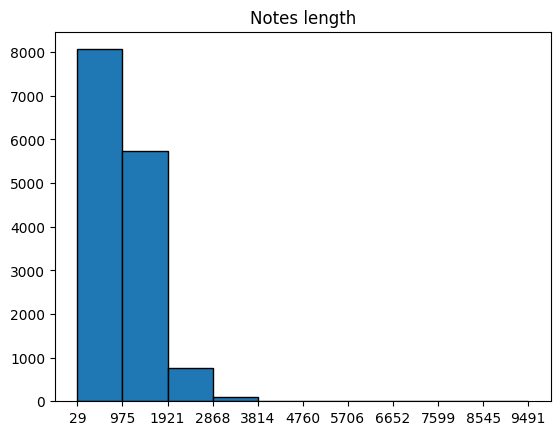

In [115]:
fig, ax = plt.subplots()
n, bins, patches = ax.hist(doclen, edgecolor='black')
ax.set_title('Notes length')
plt.xticks(bins)
fig.savefig('../data/doc_len_hist.png')
plt.show()


In [105]:
len(doclen[doclen > 3814])

18

In [103]:
with open('longest_text.txt', 'wt') as f:
    f.write(notes_split.iloc[7802].TEXT_WITHOUT_DIS_MEDICATION)

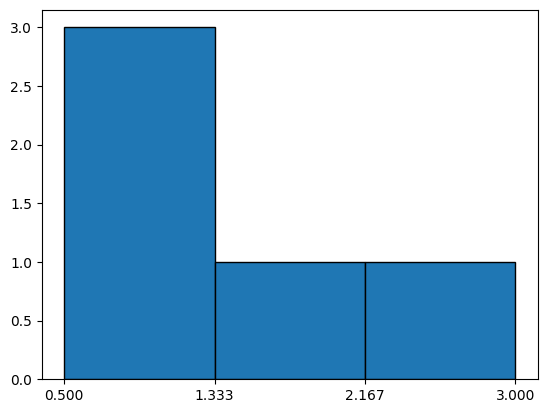

In [87]:
df = pd.DataFrame({
    'length': [1.5, 0.5, 1.2, 0.9, 3],
    'width': [0.7, 0.2, 0.15, 0.2, 1.1]
    }, index=['pig', 'rabbit', 'duck', 'chicken', 'horse'])
n, bins, patches = plt.hist(df['length'], bins=3, edgecolor='black')
plt.xticks(bins)
plt.show()



In [91]:
n

array([3., 1., 1.])

In [12]:
notes_split.to_csv('../data/notes_split.csv', index=False)

In [13]:
notes_split = pd.read_csv('../data/notes_split.csv') 

In [22]:
# np.where(notes_split["CHIEF_COMPLAINT"] == "",)
sections = ['CHIEF_COMPLAINT', 'PRESENT_ILLNESS', 'MEDICAL_HISTORY',
       'MEDICATION_ADM', 'ALLERGIES', 'PHYSICAL_EXAM', 'FAMILY_HISTORY',
       'SOCIAL_HISTORY', 'PROCEDURE', 'MEDICATION_DIS', 'DIAGNOSIS_DIS',
       'CONDITION', 'PERTINENT_RESULTS', 'HOSPITAL_COURSE']
conditions = [notes_split[col] == '' for col in sections]

In [33]:
len(notes_split)

14124

In [27]:
from functools import reduce
import operator
reduce(operator.and_, conditions)

0        False
1        False
2        False
3        False
4        False
         ...  
14678    False
14679    False
14680    False
14681    False
14682    False
Length: 14124, dtype: bool

In [32]:
[len(conditions[i]) for i in range(len(conditions))]
len(conditions[0])
len(notes_split['CHIEF_COMPLAINT'] == '')

14124